# ECON408: Assignment 3

Instructor: Jesse Perla, UBC

## Student Name/Number: (doubleclick to edit)

### Instructions

-   Edit the above cell to include your name and student number.
-   Submit a **both** the **executed** Jupyter notebook (`.ipynb`) and a
    rendered PDF file. To save as PDF, you can use the `File` menu in
    Jupyter Lab or choose `Export` for the built-in VS Code.
-   Naming convention `FIRSTNAME_LASTNAME_ASSIGNMENT_XXX.ipynb`
    modifying the `XXX` for the problem set, and an accompanying
    `FIRSTNAME_LASTNAME_ASSIGNMENT_XXX.pdf`
-   Edit code within this notebook in the provided blanks, but feel free
    to add in extra code markup and other cells.
-   Open local to the `Project.toml` and `Manifest.toml` provided files
    in this repository or the [QuantEcon Julia
    notebooks](https://github.com/QuantEcon/lecture-julia.notebooks).

In [2]:
using Distributions, Plots, LaTeXStrings, LinearAlgebra, Statistics, Random, LoopVectorization

Reusable functions, do not modify without clearly annotating your
changes.

In [3]:
function lorenz(v)  # assumed sorted vector
    S = cumsum(v)  # cumulative sums: [v[1], v[1] + v[2], ... ]
    F = (1:length(v)) / length(v)
    L = S ./ S[end]
    return (; F, L) # returns named tuple
end
# Assumes that v is sorted!
gini(v) = (2 * sum(i * y for (i,y) in enumerate(v))/sum(v)
           - (length(v) + 1))/length(v)

gini (generic function with 1 method)

## Question 1

You can create a Pareto distribution with tail parameter `a` and draw
from it with

In [4]:
a = 1.5
d = Pareto(a)
rand(d, 3)

3-element Vector{Float64}:
 5.077892084225311
 1.2597073365057532
 1.5145916055828228

The gini coefficient of a Pareto distribution is given by

$$
G = \frac{1}{2a - 1}
$$

### Part (a)

Draw `N=1000` observations from the Pareto distribution for `a = 1.5`
and calculate the gini coefficient. Compare to the closed-form solution

In [5]:
N = 1000
a = 1.5
# your code here

1.5

### Part (b)

Given a pdf $f(x)$ the cumulative distribution function is given by
$F(x) = \int_{-\infty}^x f(y) dy$. The complementary cumulative
distribution function (CCDF) is given by $F^c(x) = 1 - F(x)$. It starts
at $1$ at the minimum of the support of the distribution and then drops
to $0$ at the maximum of the support.

Take the following code which calculates the CCDF for a distribution and
a range of values `x`.

For this, plot the relationship between the `log(x)` and
`log(ccdf(d,x))` for the distribution below (this is called a [log-log
plot](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot)). Describe
what you know about this relationship?

In [7]:
ccdf(d, x) = 1 - cdf(d, x)

N = 1000
a = 1.5
d = Pareto(a)
max_x = 10.0
num_points = 100
x = range(support(d).lb, max_x, num_points)  # from the lower bound of support to max_x

# edit your code here

1.0:0.09090909090909091:10.0

### Part (b)

For the above case, numerically calculate the slope of this line
(easiest is just rise over run). Compare it to the tail parameter `a`.

In [9]:
# your code here

### Part (c)

Do we will do the [empirical
counterpart](https://en.wikipedia.org/wiki/Empirical_distribution_function).
Given unweighted vector $\{X_n\}_{n=1}^N$ of observations, we can define
the empirical CDF as

$$
\hat{F}(x) = \frac{\text{number of observations } X_n \leq x}{N}
$$

With the equivalent CCDF as $1 - \hat{F}(x)$.

The code below calculates the empirical CDF for some simulated data.
Adapt it to (1) draw `N=100` draws from the Pareto distribution above
with `a = 1.5`; (2) plot the same log-log plot as above; and (3) overlay
the plot with the theoretical log-log plot from the previous part to
compare the two.

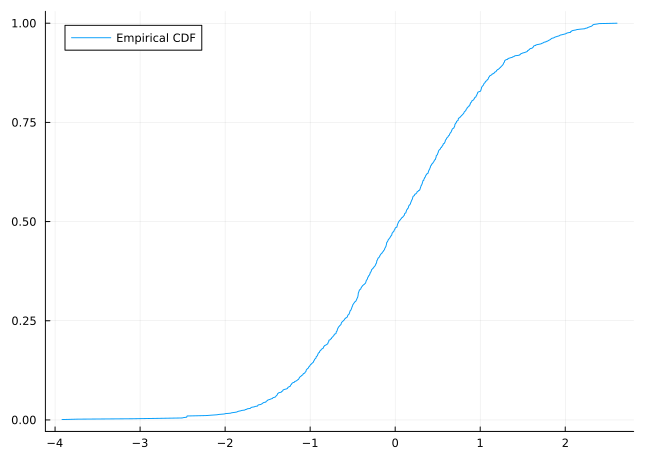

In [11]:
# your code to adapt
N = 1000
x = sort(randn(N))  # this draws normals, adapt to our areto
F_hat(x) = (1:length(x)) ./ length(x) # the cdf values at the x values are just the counts normalized by the total number of observations  No need to modify.
plot(x, F_hat(x), label="Empirical CDF") # adapt to do the log-log plot 

This shows methods for understanding the tail behavior of distributions.
If it approaches a straight line, then it is called a power-law tail.

### Part (d)

Now lets do the same empirical check on the tail behavior with a
LogNormal distribution - which does not have a power-law tail and the
[Frechet](https://en.wikipedia.org/wiki/Fr%C3%A9chet_distribution)
distribution - which does.

First, adapt your code above to (1) draw `N=1000` elements from the
`LogNormal(0.0, 0.5)` (2) plot the pdf to get a feel for the
distribution on a reasonable range, then finally (3) plot the
theoretical and empirical log-log plots as you did before.

In [13]:
# your code to adapt
N = 1000
d = LogNormal(0.0, 0.5)
# add code here to plot the pdf
# add code for the log-log plot

LogNormal{Float64}(μ=0.0, σ=0.5)

In [14]:
# your code to adapt
# add code for the log-log plot

Next do the same thing except with a `Frechet(1.5, 1)` (which has a tail
parameter of 1.5).

In [17]:
# your code to adapt
N = 1000
d = Frechet(1.5, 1.0)
# add code here to plot the pdf
# add code for the log-log plot

Frechet{Float64}(α=1.5, θ=1.0)

In [18]:
# your code to adapt
# add code for the log-log plot

### Part (e)

Comparing your answers in Part (d) and (c) what do you notice is
different theoretically between the log-log plots of distributions with
and without power-law tails? Play around with it and see if you feel you
could just look at an empirical plot and tell if it is a power-law tail
or not?

(double click to edit your answer)

## Question 2

We will take our model of [wealth
dyanamics](https://julia.quantecon.org/introduction_dynamics/wealth_dynamics.html)
and make some changes and simplifications.

Below is the relevant code from the lecture which you can use to modify
and copy/paste as you see fit

median(res.w) = 38.60437645326128
res.gini = 0.7347121876173813

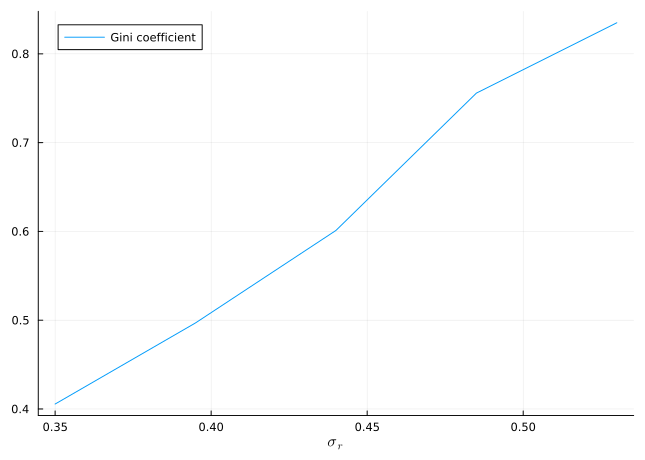

In [21]:
# Modify directly here or copy to the new cell
function wealth_dynamics_model(; # all named arguments
                 w_hat=1.0, # savings parameter
                 s_0=0.75, # savings parameter
                 c_y=1.0, # labor income parameter
                 μ_y=1.0, # labor income parameter
                 σ_y=0.2, # labor income parameter
                 c_r=0.05, # rate of return parameter
                 μ_r=0.1, # rate of return parameter
                 σ_r=0.5, # rate of return parameter
                 a=0.5, # aggregate shock parameter
                 b=0.0, # aggregate shock parameter
                 σ_z=0.1 # aggregate shock parameter
                 )
    z_mean = b / (1 - a)
    z_var = σ_z^2 / (1 - a^2)
    exp_z_mean = exp(z_mean + z_var / 2)
    R_mean = c_r * exp_z_mean + exp(μ_r + σ_r^2 / 2)
    y_mean = c_y * exp_z_mean + exp(μ_y + σ_y^2 / 2)
    α = R_mean * s_0

    # Distributions
    z_stationary_dist = Normal(z_mean, sqrt(z_var))

    @assert α <= 1 # check stability condition that wealth does not diverge
    return (;w_hat, s_0, c_y, μ_y, σ_y, c_r, μ_r, σ_r, a, b, σ_z, z_mean,
             z_var,z_stationary_dist, exp_z_mean, R_mean, y_mean, α)
end
function simulate_panel(N, T, p)
    (;w_hat, s_0, c_y, μ_y, σ_y, c_r, μ_r, σ_r, a, b, σ_z) = p
    w = p.y_mean * ones(N) # start at the mean of y
    z = rand(p.z_stationary_dist, N)
    
    # Preallocate next period states and R intermediate
    zp = similar(z)
    wp = similar(w)
    R = similar(w)

    for t in 1:T
        z_shock = randn(N)
        R_shock = randn(N)
        w_shock = randn(N)
        @turbo for i in 1:N
            zp[i] = a*z[i] + b + σ_z*z_shock[i]
            R[i] = (w[i] >= w_hat) ? c_r*exp(zp[i]) + exp(μ_r + σ_r*R_shock[i]) : 0.0
            wp[i] = c_y*exp(zp[i]) + exp(μ_y + σ_y*w_shock[i]) + R[i]*s_0*w[i]            
        end
        # Step forward
        w .= wp
        z .= zp
    end    
    sort!(w) # sorts the wealth so we can calculate gini/lorenz        
    F, L = lorenz(w)
    return (;w, F, L, gini = gini(w))
end
p = wealth_dynamics_model()
N = 100_000
T = 500
res = simulate_panel(N, T, p)
@show median(res.w)
@show res.gini
σ_r_vals = range(0.35, 0.53, 5)
results = map(σ_r -> simulate_panel(N, T, wealth_dynamics_model(;σ_r)),
              σ_r_vals);
plt = plot(results[1].F, results[1].F, label = "equality", legend = :topleft,
           ylabel="Lorenz Curve")
[plot!(plt, res.F, res.L, label = L"\psi^*, \sigma_r = %$σ_r")
 for (σ_r, res) in zip(σ_r_vals, results)]
plt
ginis = [res.gini for res in results]
plot(σ_r_vals, ginis, label = "Gini coefficient", xlabel = L"\sigma_r")              

### Part (a)

Rather than the $z_t$ process being something independent between
individuals (where you will notice we simulated it separately for each
`i` ), we will instead treat it as a common process shared by all of the
agents.

Modify the code and plot a graph of the gini coefficient as a function
of $\sigma_r$ in `range(0.35, 0.53, 5)` as before.

Hint: the `simulate_panel` will need to be modified such that `z` is no
longer a vector of length `N` but rather a scalar you can simulate
jointly. Most of the other functions can remain unchanged

In [22]:
# add new or modified code here, flagging modified code with comments if you wish

### Part (b)

For the new process you defined in Part (a), get the resulting wealth
simulation `w` and use your code for the log-log plots above to examine
the cumulative distribution of wealth. Feel free to use the `F_hat`
function above in your plots

In [24]:
p = wealth_dynamics_model()
N = 100_000
T = 500
# add new or modified code here

500

### Part (c)

Given the above, and reflecting on Question 1, do you think there is
evidence of a powerlaw tail?

(double click to edit your answer)